In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import List, Dict, Any
import sys
import pandas as pd
sys.path.append('..')
from wyscout.match import get_team_matches, get_match_details
from wyscout.stats import get_touches_for_player

In [17]:
SOUTHEND = 1687
NOTTS_C = 1677
WREXHAM = 10530
BARNET = 1701
WEALDSTONE = 1833

SEASON_2022 = 188172

J_BRIDGE = 289901
S_HOBSON = 489434
C_POWELL = 444130
M_DAKERS = 601997
K_LOPATA = 592169
H_CARDWELL = 330285

In [7]:
matches = get_team_matches(SOUTHEND, SEASON_2022)
for m in matches["matches"]:
    print(m["matchId"], m["date"], m["label"])

match_id = matches["matches"][0]["matchId"]
team_id = SOUTHEND 
season = SEASON_2022

5369295 2023-04-29 18:30:00 Southend United - Wealdstone, 2-1
5369279 2023-04-22 16:00:00 Scunthorpe United - Southend United, 1-3
5369076 2023-04-18 20:45:00 Oldham Athletic - Southend United, 2-0
5369271 2023-04-15 16:00:00 Southend United - Dagenham & Redbridge, 2-0
5369257 2023-04-10 16:00:00 Woking - Southend United, 1-1
5369247 2023-04-07 16:00:00 Southend United - Maidstone United, 2-0
5369235 2023-04-01 18:20:00 Yeovil Town - Southend United, 0-2
5369120 2023-03-28 20:45:00 Dorking Wanderers - Southend United, 1-0
5369214 2023-03-25 16:00:00 Altrincham - Southend United, 1-0
5369210 2023-03-18 16:00:00 Southend United - Aldershot Town, 1-2
5369008 2023-03-14 20:45:00 Boreham Wood - Southend United, 1-0
5369199 2023-03-11 16:00:00 Wrexham - Southend United, 1-0
5369186 2023-03-07 20:45:00 Southend United - Chesterfield, 1-2
5369174 2023-03-03 20:45:00 Southend United - Barnet, 0-1
5369161 2023-02-25 16:00:00 Torquay United - Southend United, 1-2
5369149 2023-02-21 20:45:00 Notts

/workspaces/sufc_stats/.venv/sufc-stats--ixh6ZGa-py3.11/lib/python3.11/site-packages/mplsoccer/_pitch_plot.py:172: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)
/workspaces/sufc_stats/.venv/sufc-stats--ixh6ZGa-py3.11/lib/python3.11/site-packages/mplsoccer/_pitch_plot.py:172: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


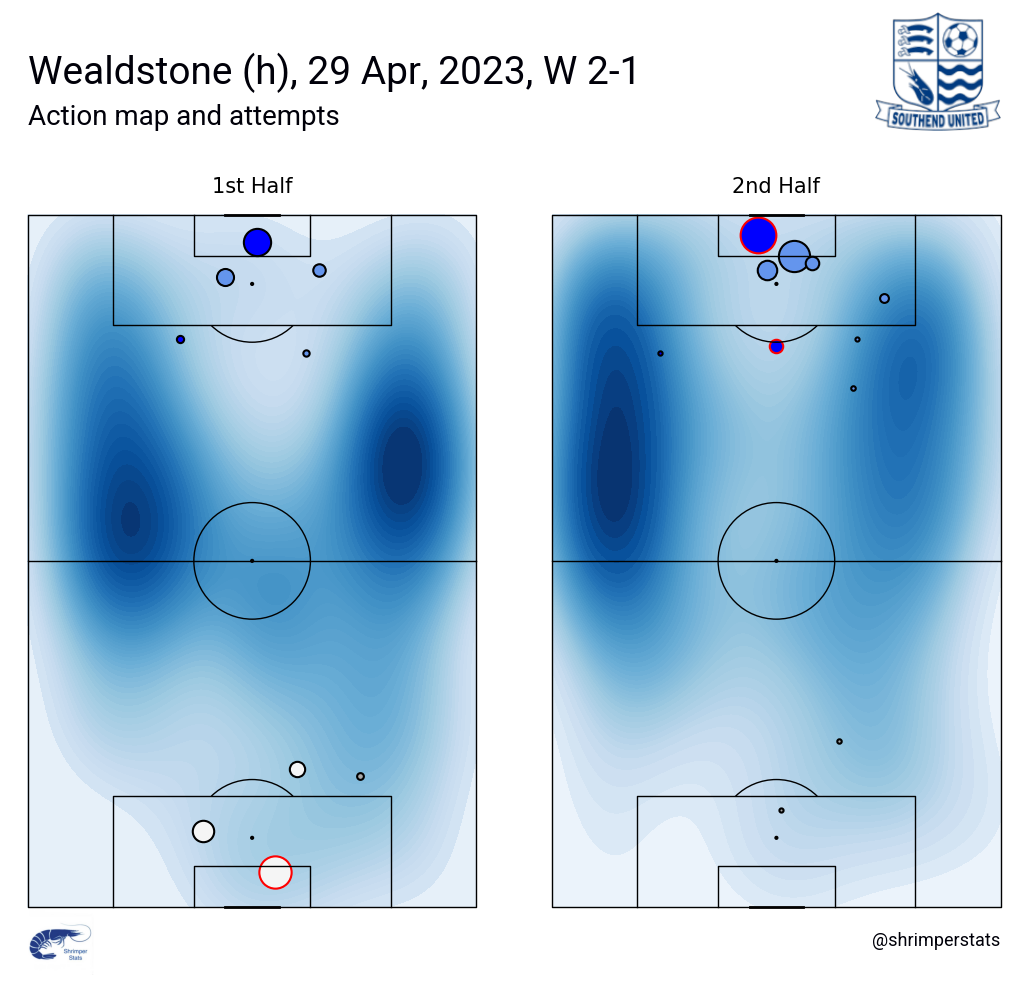

In [8]:
from wyscout.viz.match import plot_match_heat_map

plot_match_heat_map(
    team_id,
    match_id,
    fig_height=10,
    cmap="Blues",
    shot_colors=("blue", "cornflowerblue"),
    subtitle=["Action map and attempts"], #["plus Jack Bridge received passes"],
    show_passes_received=[],#[J_BRIDGE]
)

/workspaces/sufc_stats/.venv/sufc-stats--ixh6ZGa-py3.11/lib/python3.11/site-packages/mplsoccer/_pitch_plot.py:172: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


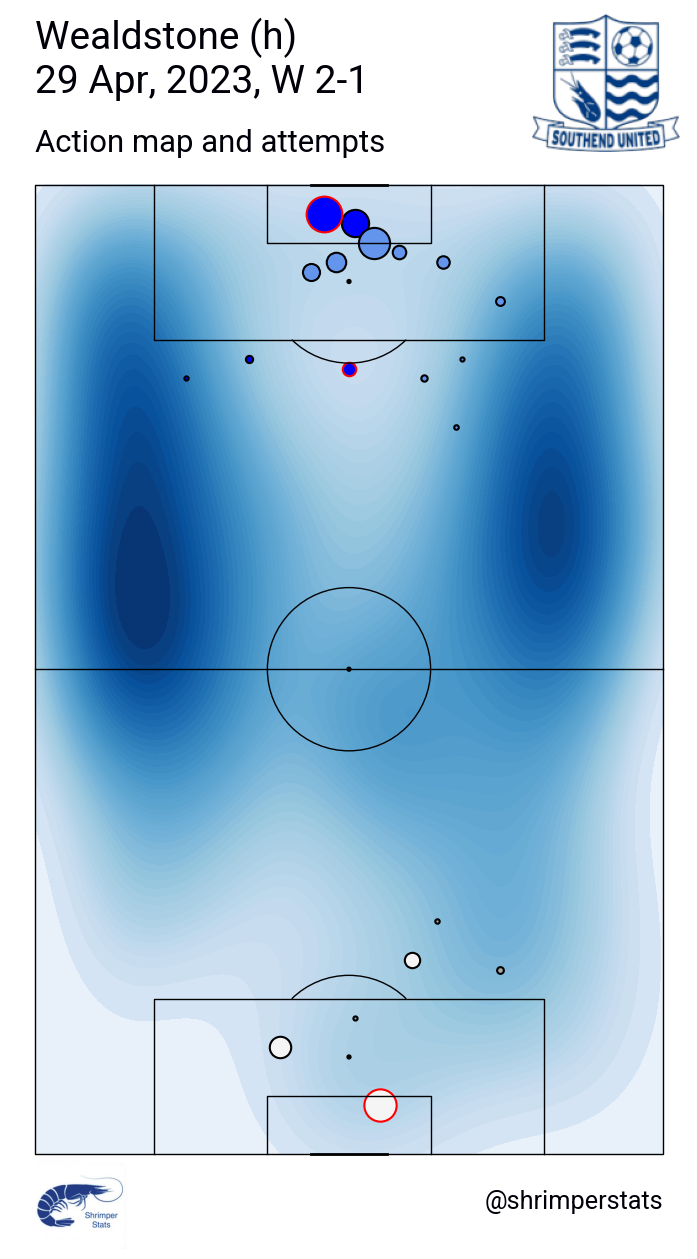

In [9]:
plot_match_heat_map(
    team_id,
    match_id,
    fig_height=14,
    cmap="Blues",
    shot_colors=("blue", "cornflowerblue"),
    subtitle=["Action map and attempts"], #["plus Jack Bridge received passes"],
    show_passes_received=[],#[J_BRIDGE]
    split_halves=False
)

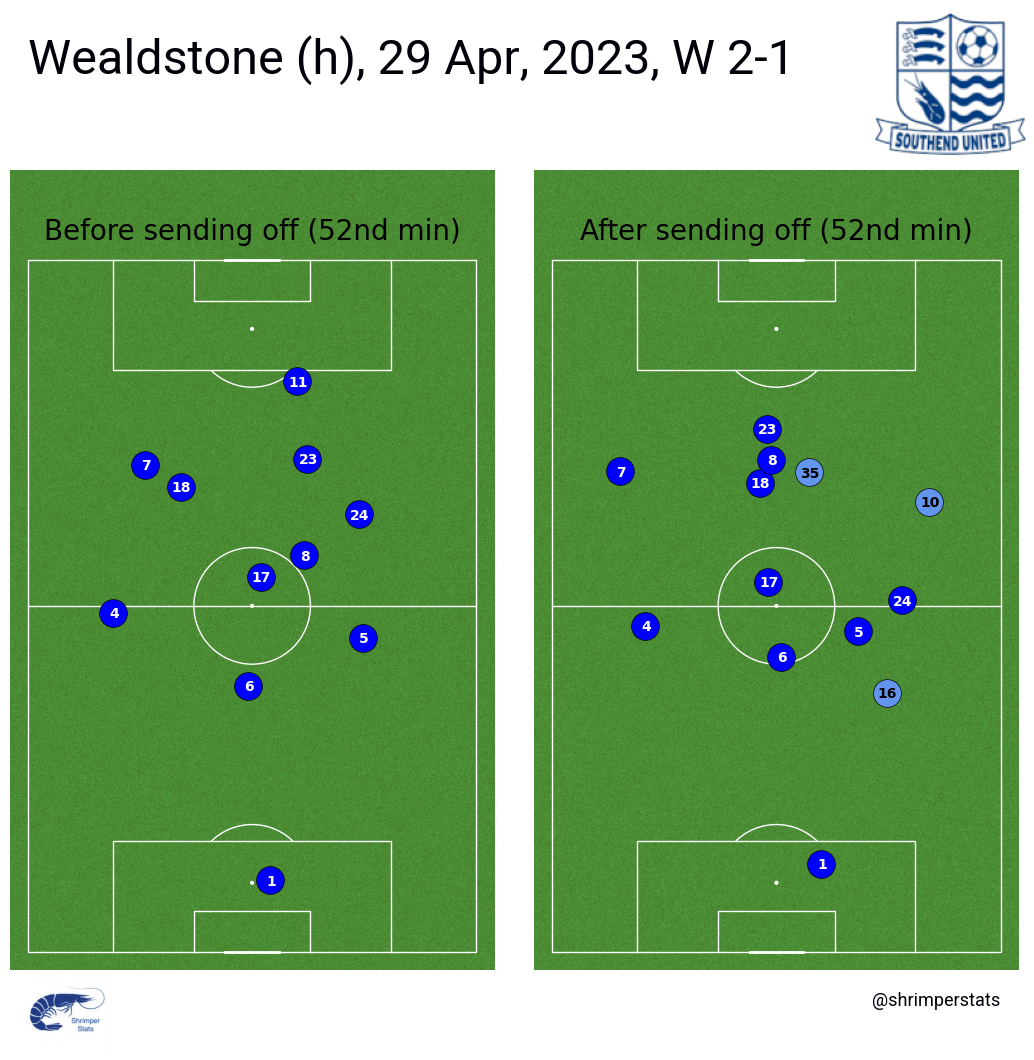

In [10]:
from wyscout.viz.match import plot_average_positions

def filter_fn(e):
    return e["minute"] < 52

# plot_average_positions(team_id, match_id, colors=["gold", "cornsilk"], text_colors=["black", "black"], subtitle=["Before sending off (52nd min)", "After sending off (52nd min)"], filter_fn=filter_fn)

plot_average_positions(team_id, match_id, subtitle=["Before sending off (52nd min)", "After sending off (52nd min)"], filter_fn=filter_fn)

/workspaces/sufc_stats/.venv/sufc-stats--ixh6ZGa-py3.11/lib/python3.11/site-packages/mplsoccer/_pitch_plot.py:172: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


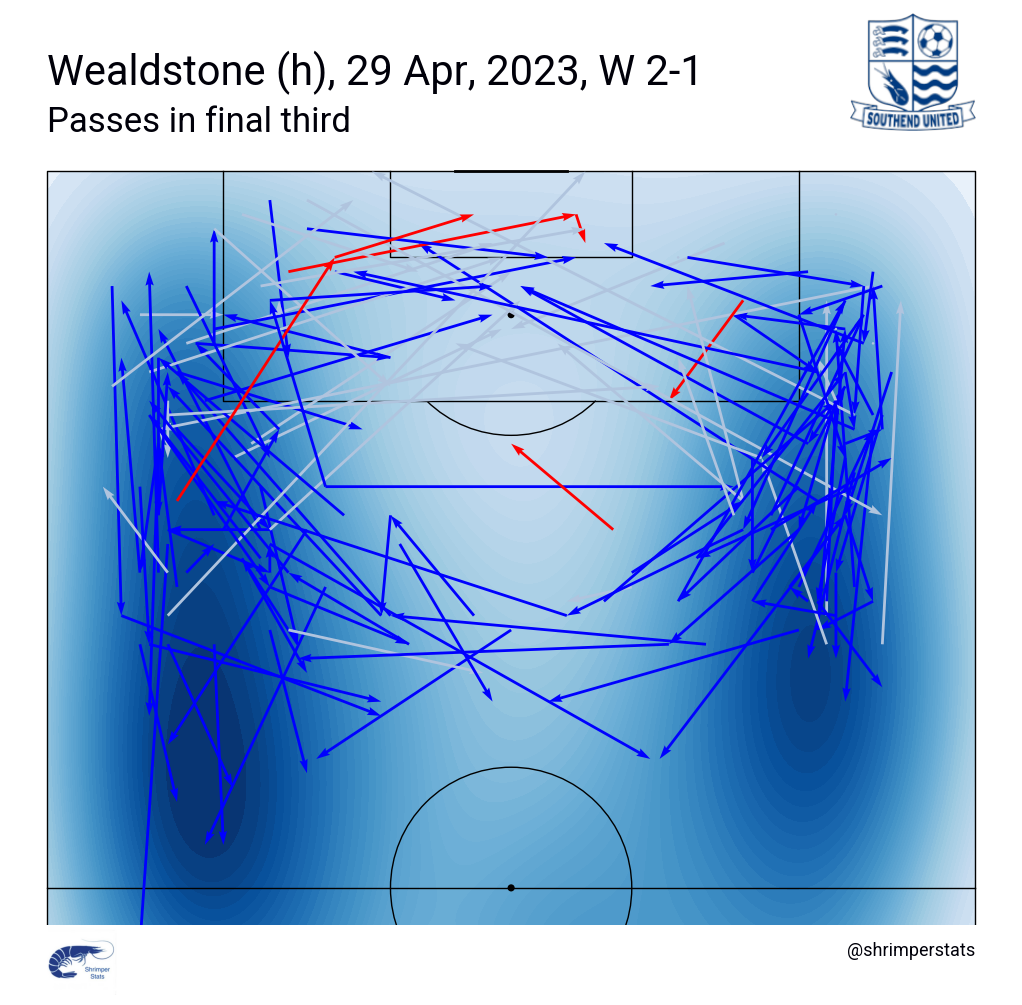

In [14]:
from wyscout.viz.match import plot_last_third_passes
plot_last_third_passes(team_id, match_id, fig_height=10, pass_colors=["blue", "lightsteelblue"])

/workspaces/sufc_stats/.venv/sufc-stats--ixh6ZGa-py3.11/lib/python3.11/site-packages/mplsoccer/_pitch_plot.py:172: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


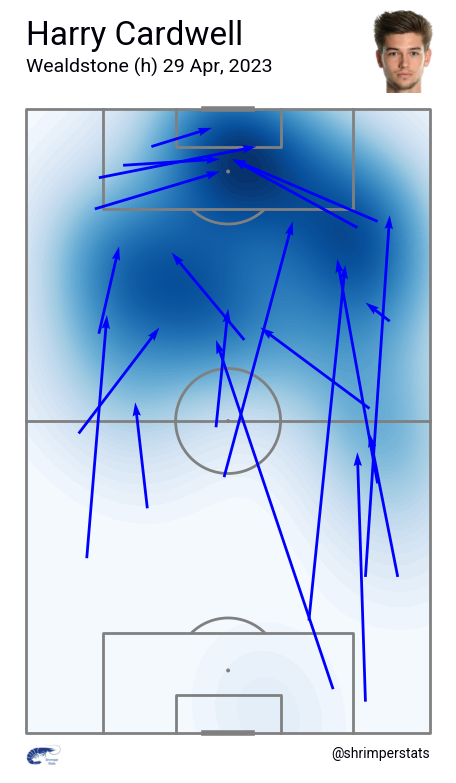

In [18]:
from wyscout.viz.viz import player_heat_map_for_match
player_heat_map_for_match(
    H_CARDWELL,
    SOUTHEND,
    match_id=match_id,
    show_passes=False,
    show_crosses=False,
    show_passes_received=True,
    period=None)

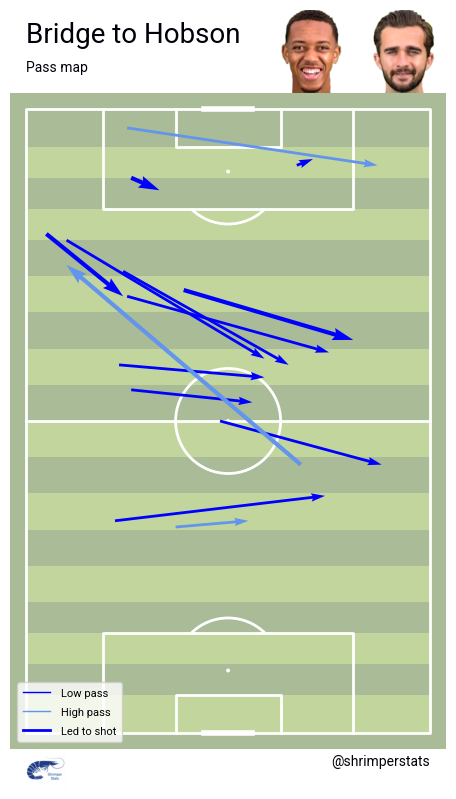

In [19]:
from wyscout.viz.viz import player_pass_map_for_season
player_pass_map_for_season(
    J_BRIDGE,
    S_HOBSON,
    SOUTHEND,
    SEASON_2022,
    subtitle=["Pass map"])

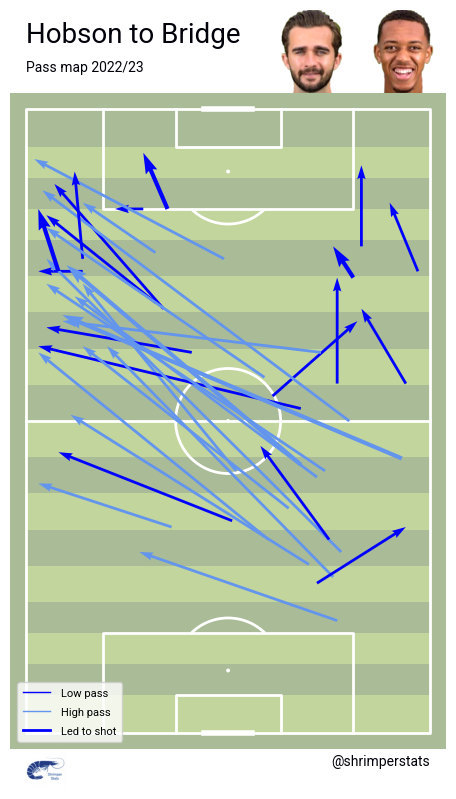

In [21]:
from wyscout.viz.viz import player_pass_map_for_season
player_pass_map_for_season(S_HOBSON, J_BRIDGE, SOUTHEND, SEASON_2022,
    subtitle=["Pass map 2022/23"]
)